<a href="https://colab.research.google.com/github/zacharyvunguyen/End-to-End-Heart-Disease-Classification/blob/main/FINAL_Heart_Disease_Classification_1002_PCR2310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease with Machine Learning Algorithms

In [ ]:
#!pip install pycaret
#!pip install explainerdashboard
#!pip install fast api
#!pip install uvicorn
#!pip install gradio

In [ ]:
import pycaret
pycaret.__version__

'2.3.10'

#*Libraries & Data

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle Dataset

In [ ]:
raw = pd.read_csv("/content/drive/MyDrive/0_data_science/heart_disease/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
raw.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [ ]:
heart_df = pd.read_csv("/content/drive/MyDrive/0_data_science/heart_disease/heart_statlog_cleveland_hungary_final.csv")

# Data Cleaning

In [ ]:
# renaming features to proper name
heart_df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope','HeartDisease']

## Print in Color Function

In [ ]:
def print_in_color(txt_msg,fore_tupple=(248, 252, 3),back_tupple=(100,100,100)):
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return
msg='test of default colors'
print_in_color(msg)

test of default colors



## Check unique values in each columns

In [ ]:
#for col in heart_df.columns:
#  print_in_color(f'Unique values of {col} column: {heart_df[col].nunique()}')
#  print(f'{heart_df[col].unique()}\n ********************* \n')

In [ ]:
heart_df["Sex"] = heart_df.Sex.apply(lambda  x:'M' if x==1 else 'F')
heart_df['ChestPainType'] = heart_df['ChestPainType'].map({1: 'TA', 2: 'ATA', 3: 'NAP',4: 'ASY'})
heart_df['RestingECG'] = heart_df['RestingECG'].map({0: 'Normal', 1: 'ST', 2: 'LVH'})
heart_df['ST_Slope'] = heart_df['ST_Slope'].map({0: 'NORMAL', 1: 'UP', 2: 'FLAT', 3:'DOWN'})
heart_df["ExerciseAngina"] = heart_df.ExerciseAngina.apply(lambda  x:'Y' if x==1 else 'N')
heart_df["FastingBS"] = heart_df.FastingBS.apply(lambda  x:'Y' if x==1 else 'N')

##RE-Check unique values in each columns

In [ ]:
for col in (['ChestPainType','RestingECG','ST_Slope','ExerciseAngina','FastingBS']):
  print_in_color(f'Unique values of {col} column: {heart_df[col].nunique()}')
  print(f'{heart_df[col].unique()}\n ********************* \n')

Unique values of ChestPainType column: 4

['ATA' 'NAP' 'ASY' 'TA']
 ********************* 

Unique values of RestingECG column: 3

['Normal' 'ST' 'LVH']
 ********************* 

Unique values of ST_Slope column: 4

['UP' 'FLAT' 'DOWN' 'NORMAL']
 ********************* 

Unique values of ExerciseAngina column: 2

['N' 'Y']
 ********************* 

Unique values of FastingBS column: 2

['N' 'Y']
 ********************* 



## Missing Values

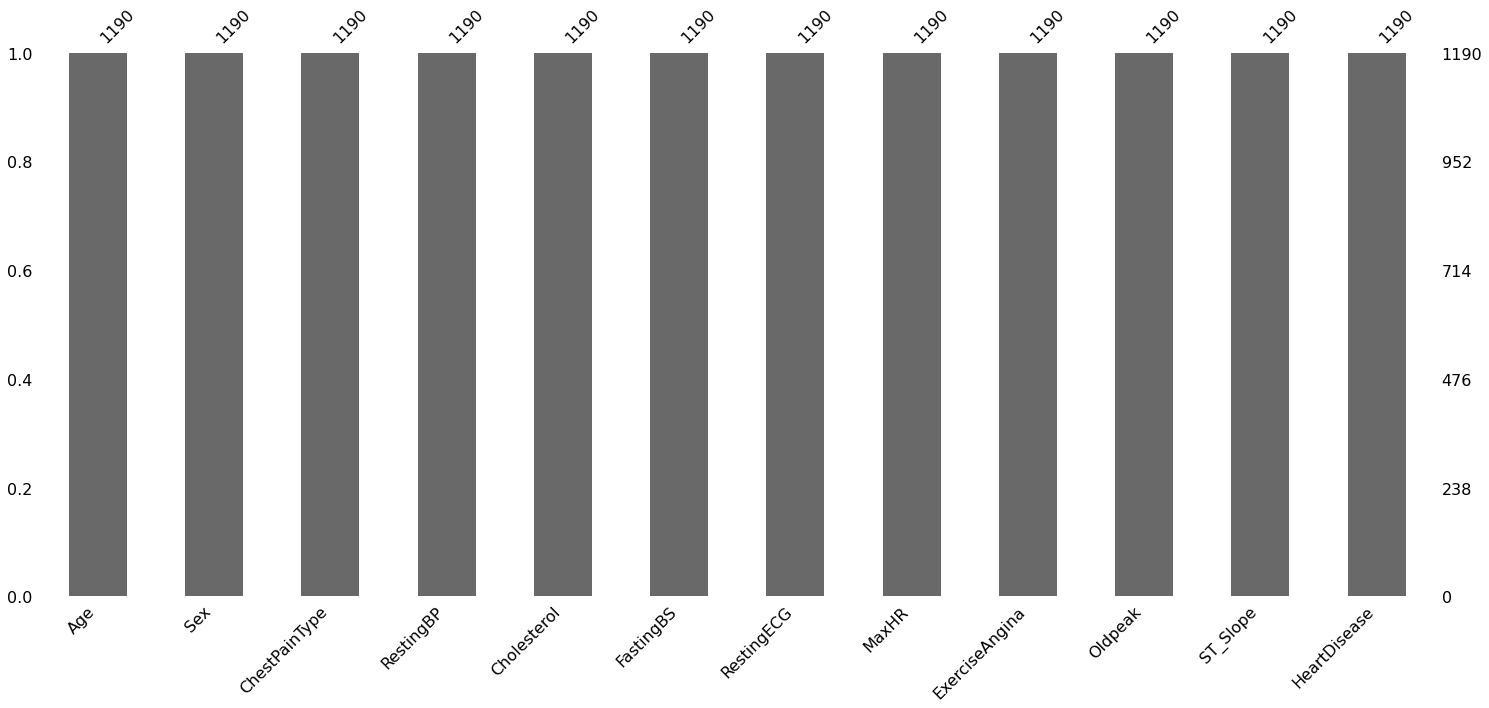

In [ ]:
import missingno as msno
msno.bar(heart_df)

#Exploratory Data Analysis

##TABLEAU-Categorial Features Variables

In [ ]:
cat_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                    heart_df[cname].dtype == "object"]
cat_cols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

### Heart Disease Classification - Categorical Data Analyis DASHBOARD
[Click Here](https://public.tableau.com/views/HeartDiseaseClassification-CategoricalDataDistribution/CATEGORICALDASHBOARD?:language=en-US&:display_count=n&:origin=viz_share_link)

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1664672325117' style='position: relative'><noscript><a href='#'><img alt='CATEGORICAL DASHBOARD ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HeartDiseaseClassification-CategoricalDataDistribution&#47;CATEGORICALDASHBOARD&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HeartDiseaseClassification-CategoricalDataDistribution&#47;CATEGORICALDASHBOARD' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HeartDiseaseClassification-CategoricalDataDistribution&#47;CATEGORICALDASHBOARD&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1664672325117');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##*TABLEAU-Numeric Feature Variables

In [ ]:
num_cols = [cname for cname in heart_df.loc[:,:'ST_Slope'].columns if
                    heart_df[cname].dtype != "object"]
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

### Heart Disease Classification - Numerical Data Distribution DASHBOARD
[Click Here](https://public.tableau.com/views/HeartDiseaseClassification-NumericalDataDistribution/NUMERIC_DASHBOARD?:language=en-US&:display_count=n&:origin=viz_share_link)

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1664671965478' style='position: relative'><noscript><a href='#'><img alt='NUMERIC_DASHBOARD ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HeartDiseaseClassification-NumericalDataDistribution&#47;NUMERIC_DASHBOARD&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HeartDiseaseClassification-NumericalDataDistribution&#47;NUMERIC_DASHBOARD' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HeartDiseaseClassification-NumericalDataDistribution&#47;NUMERIC_DASHBOARD&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1664671965478');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1377px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#Data Preparation

## Outliers Handling
Let's change the outlier to the median value. 

In [ ]:
import statistics
from scipy import stats

In [ ]:
def outlier_median(feature):
  heart_df[feature].replace(0, heart_df[feature].median(),inplace=True)

In [ ]:
def display_stat(feature):
    mean = heart_df[feature].mean()
    median = heart_df[feature].median()
    mode = statistics.mode(heart_df[feature])
    std = heart_df[feature].std()
    skew = heart_df[feature].skew()
    kurtosis = heart_df[feature].kurtosis()
    print_in_color(f'mean: {mean}, median: {median}, mode: {mode} std: {std}, skew: {skew}, kurtosis: {kurtosis}')
   

In [ ]:
def plot_data_dist(heart_df,col):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(heart_df[col], label="skew: " + str(np.round(heart_df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(heart_df[col])
    plt.subplot(133)
    stats.probplot(heart_df[col], plot=plt)
    plt.tight_layout()
    plt.show()
    display_stat(col)
    plot_histgram(col)

In [ ]:
def plot_histgram(feature): 
    plt.figure(figsize=(15,8))   
    fig = px.histogram(heart_df, x=feature,
                       color="HeartDisease", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="black",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

In [ ]:
def plot_data_dist(heart_df,col):
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(heart_df[col], label="skew: " + str(np.round(heart_df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(heart_df[col])
    plt.subplot(133)
    stats.probplot(heart_df[col], plot=plt)
    plt.tight_layout()
    plt.show()
    display_stat(col)
    plot_histgram(col)

### Remove ST Slope = Normal

In [ ]:
#dropping row with st_slope =normal
heart_df.drop(heart_df[heart_df.ST_Slope =='NORMAL'].index, inplace=True)
#checking distribution
heart_df['ST_Slope'].value_counts()

FLAT    582
UP      526
DOWN     81
Name: ST_Slope, dtype: int64

### Resting BP Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


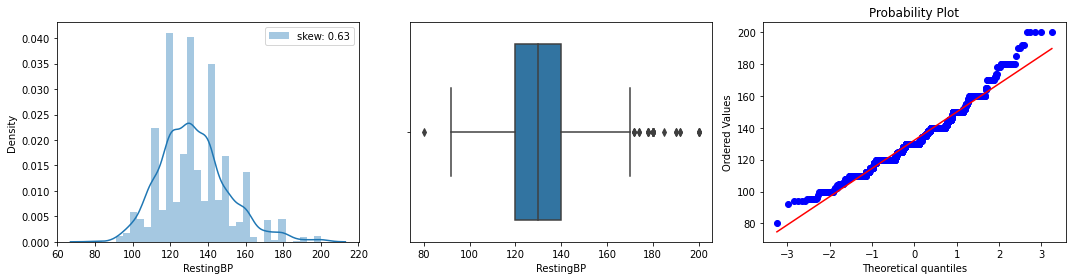

mean: 132.24810765349034, median: 130.0, mode: 120 std: 17.96451347272264, skew: 0.6330492245339018, kurtosis: 0.8080997979613915



<Figure size 1080x576 with 0 Axes>

In [ ]:
outlier_median('RestingBP')
plot_data_dist(heart_df,'RestingBP')

### *Cholesterol Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



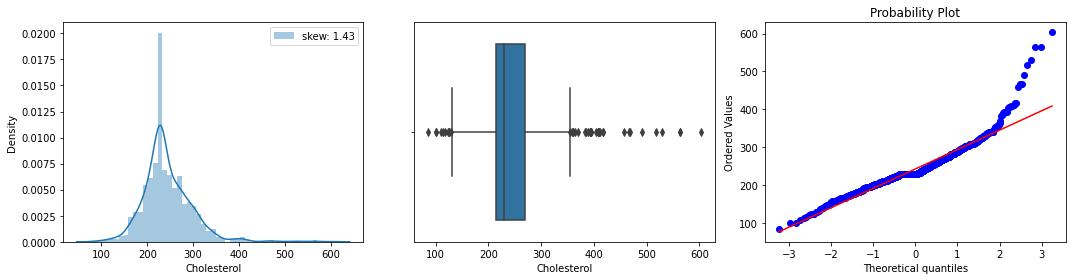

mean: 243.50378469301936, median: 229.0, mode: 229 std: 53.27932265933736, skew: 1.4262397369319078, kurtosis: 5.9420778192262205



<Figure size 1080x576 with 0 Axes>

In [ ]:
outlier_median('Cholesterol')
plot_data_dist(heart_df,'Cholesterol')

##Checking Feature Importance
`Choosing the right features to judge heart disease will help you make a more informed decision. This will also be very useful when explaining the diagnosis to patients.`

In [ ]:
ImpT_Feature_df = pd.get_dummies(heart_df,drop_first=True)
#ImpT_Feature_df.describe().transpose()

Text(0.5, 1.0, 'Correlation Plot')

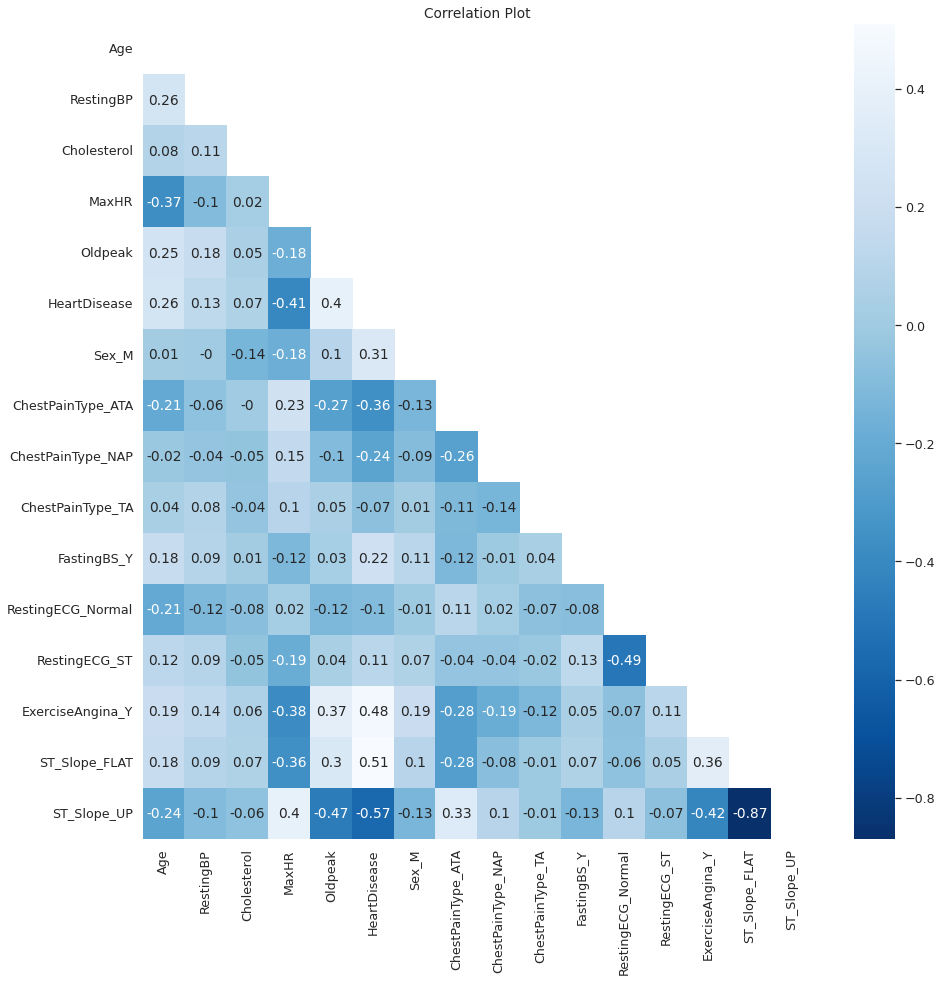

In [ ]:
import numpy as np
corr=ImpT_Feature_df.corr().round(2)
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

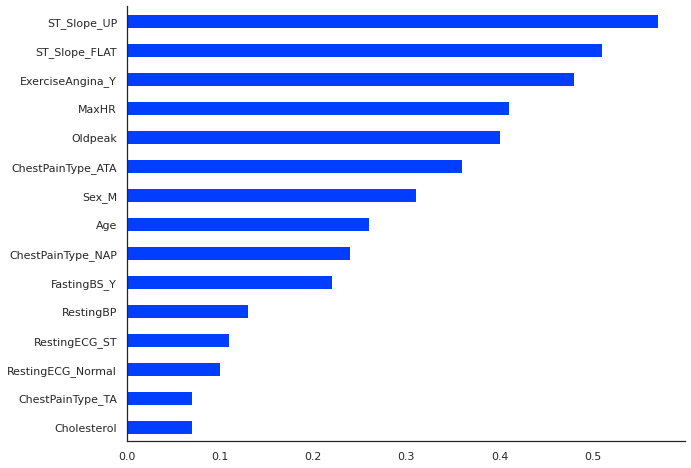

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = ImpT_Feature_df.drop(['HeartDisease'],axis=1)
y = ImpT_Feature_df['HeartDisease']

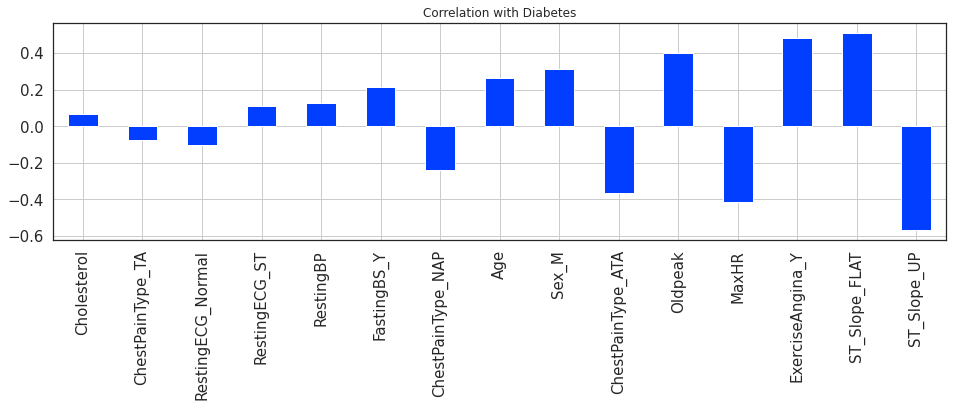

In [ ]:
X.corrwith(y).sort_values(key = lambda dig: abs(dig)).plot.bar(
        figsize = (16, 4), 
        title = "Correlation with Diabetes", 
        fontsize = 15,
        rot = 90, grid = True)

#Modelling

In [ ]:
heart_df.head(3)

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289         N     Normal    172   
1   49   F           NAP        160          180         N     Normal    156   
2   37   M           ATA        130          283         N         ST     98   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       UP             0  
1              N      1.0     FLAT             1  
2              N      0.0       UP             0

In [ ]:
num_cols = ['Age','Cholesterol','RestingBP','MaxHR','Oldpeak']
cal_cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

## Model Comparing

In [ ]:
from pycaret.classification import *

In [ ]:
setup(data = heart_df, 
      target = 'HeartDisease',
      #preprocess = False,
      #normalize=True,
      numeric_features = num_cols,
      categorical_features= cal_cols,
      #verbose = False,
      #silent = True,
      session_id=927,
      use_gpu=True)

Description             Value
0                               session_id               927
1                                   Target      HeartDisease
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (1189, 12)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (832, 18)
12                    Transformed Test Set         (357, 18)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              53c0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex',
                                                            'ChestPainType',
                                                            'FastingBS',
                                                            'RestingECG',
                                                            'ExerciseAngina',
                                                            'ST_Slope'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'Cholesterol',
                                                          'RestingBP', 'MaxHR',
                                      

(Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
        Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_M  ChestPainType_ASY  \
 0     40.0      140.0        289.0  172.0      0.0    1.0                0.0   
 1     49.0      160.0        180.0  156.0      1.0    0.0                0.0   
 2     37.0      130.0        283.0   98.0      0.0    1.0                0.0   
 3     48.0      138.0        214.0  108.0      1.5    0.0                1.0   
 4     54.0      150.0        195.0  122.0      0.0    1.0                0.0   
 ...    ...        ...          ...    ...      ...    ...                ...   
 1185  45.0      110.0        264.0  132.0      1.2    1.0                0.0   
 1186  68.0      144.0        193.0  141.0      3.4    1.0                1.0   
 1187  57.0      130.0        131.0  115.0      1.2    1.0                1.0   
 1188  57.0      130.0        236.0  174.0      0.0    0.0                0.0   
 1189  38.0      138.0        1

In [ ]:
#X_train dataset
get_config('X_train').head(3)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as        Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_M  ChestPainType_ASY  \
1002  41.0      135.0        203.0  132.0      0.0    1.0                0.0   
184   46.0      110.0        238.0  140.0      1.0    1.0                1.0   
541   62.0      138.0        204.0  122.0      1.2    1.0                0.0   
327   45.0      110.0        229.0  138.0     -0.1    1.0                0.0   
912   50.0      120.0        219.0  158.0      1.6    0.0                0.0   
...    ...        ...          ...    ...      ...    ...                ...   
16    38.0      110.0        196.0  166.0      0.0    1.0                1.0   
356   67.0      145.0        229.0  125.0      0.0    1.0                0.0   
34    43.0      150.0        186.0  154.0      0.0    0.0                0.0   
277   51.0      135.0        160.0  150.0      2.0    1.0                0.0  

Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Sex_M  ChestPainType_ASY  \
1002  41.0      135.0        203.0  132.0      0.0    1.0                0.0   
184   46.0      110.0        238.0  140.0      1.0    1.0                1.0   
541   62.0      138.0        204.0  122.0      1.2    1.0                0.0   

      ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  FastingBS_Y  \
1002                1.0                0.0               0.0          0.0   
184                 0.0                0.0               0.0          0.0   
541                 0.0                1.0               0.0          0.0   

      RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
1002             0.0                1.0            0.0               0.0   
184              0.0                0.0            1.0               1.0   
541              0.0                0.0            1.0               1.0   

      ST_Slope_DOWN  ST_Slope_FLAT  ST_Slope_UP  
1002            0.0            1.0          0.0  
184             0.0            1.0          0.0  
541             0.0            1.0          0.0

## *Choosing Top 5 Model with Highest Recall Values

In [ ]:
top5_models = compare_models(
  n_select = 5,
  sort="Recall",
  exclude=['dummy'])

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9026  0.9511  0.9154  0.9024   
gbc          Gradient Boosting Classifier    0.8894  0.9428  0.9040  0.8883   
et                 Extra Trees Classifier    0.8918  0.9521  0.9039  0.8929   
lightgbm  Light Gradient Boosting Machine    0.9002  0.9524  0.9017  0.9085   
lr                    Logistic Regression    0.8486  0.9204  0.8627  0.8511   
ridge                    Ridge Classifier    0.8462  0.0000  0.8605  0.8494   
lda          Linear Discriminant Analysis    0.8462  0.9200  0.8605  0.8494   
ada                  Ada Boost Classifier    0.8522  0.9168  0.8583  0.8611   
dt               Decision Tree Classifier    0.8462  0.8465  0.8397  0.8641   
nb                            Naive Bayes    0.8270  0.9076  0.8284  0.8413   
knn                K Neighbors Classifier    0.6877  0.7450  0.7325  0.6923   
qda       Quadratic Discriminant Analysis    0.5731  0.5710  0.6084  0.6102   
svm                   SVM - Linear Kernel    0.6000  0.0000  0.4901  0.7129   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9085  0.8044  0.8052     0.725  
gbc       0.8957  0.7781  0.7790     0.132  
et        0.8976  0.7829  0.7846     0.737  
lightgbm  0.9048  0.8000  0.8006     0.065  
lr        0.8567  0.6962  0.6967     0.408  
ridge     0.8545  0.6914  0.6921     0.027  
lda       0.8545  0.6914  0.6921     0.017  
ada       0.8591  0.7037  0.7048     0.102  
dt        0.8509  0.6921  0.6938     0.012  
nb        0.8341  0.6533  0.6545     0.010  
knn       0.7102  0.3719  0.3752     0.139  
qda       0.5879  0.1420  0.1638     0.012  
svm       0.4576  0.2112  0.2603     0.012

INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=927, verbose=0,
                       warm_start=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples

In [ ]:
#Top 5 models dataframe
model_output=pull().head(5)

In [ ]:
#Top 5 models dataframe
top5_model_index=model_output['Model'].index

In [ ]:
top1_model = top5_model_index[0]
top2_model = top5_model_index[1]
top3_model = top5_model_index[2]
top4_model = top5_model_index[3]
top5_model = top5_model_index[4]

##Top 5 Model Training

In [ ]:
def create_model_custom(model_name):
  model = create_model(model_name,verbose=False)
  result=pull()
  print(result.loc[['Mean']])
  return model

In [ ]:
model_1 = create_model_custom(top1_model)
model_2 = create_model_custom(top2_model)
model_3 = create_model_custom(top3_model)
model_4 = create_model_custom(top4_model)
model_5 = create_model_custom(top5_model)


INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=rf, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
I

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.9026  0.9511  0.9154  0.9024  0.9085  0.8044  0.8052


INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=927, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
IN

      Accuracy     AUC  Recall   Prec.      F1   Kappa    MCC
Fold                                                         
Mean    0.8894  0.9428   0.904  0.8883  0.8957  0.7781  0.779


INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=927, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fol

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8918  0.9521  0.9039  0.8929  0.8976  0.7829  0.7846


INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=927, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, grou

      Accuracy     AUC  Recall   Prec.      F1  Kappa     MCC
Fold                                                         
Mean    0.9002  0.9524  0.9017  0.9085  0.9048    0.8  0.8006


INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8486  0.9204  0.8627  0.8511  0.8567  0.6962  0.6967


# Model Optimization

In [ ]:
def print_in_color(txt_msg,fore_tupple=(248, 252, 3),back_tupple=(100,100,100)):
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return
#msg='test of default colors'
#print_in_color(msg)

## Custom Model Tunning Function:
* Tune the existed model with different hyperparameter
* A tuned model does not always deliver better results. 
* Even if the optimization of the hyperparameters does not result in an improvement, the original model is returned instead of a worse model



In [ ]:
def tune_model_custom(model,model_output,model_index):
  tuned_model = tune_model(model,verbose = False,choose_better = True)
  result=pull()
  print_in_color(f'Pre-Tuned Model Result:')
  print(model_output.iloc[[model_index]])
  print_in_color(f'Tuned Model Result:')
  print(result.loc[['Mean']])
  return tuned_model

In [ ]:
tuned_model1=tune_model_custom(model_1,model_output,0)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=927, verbose=0,
                       warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:C

Pre-Tuned Model Result:

                       Model  Accuracy     AUC  Recall   Prec.      F1  \
rf  Random Forest Classifier    0.9026  0.9511  0.9154  0.9024  0.9085   

     Kappa     MCC  TT (Sec)  
rf  0.8044  0.8052     0.725  
Tuned Model Result:

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.9002  0.9511  0.9132  0.8992  0.9058  0.7998  0.8004


In [ ]:
tuned_model2=tune_model_custom(model_2,model_output,1)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=927, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=N

Pre-Tuned Model Result:

                            Model  Accuracy     AUC  Recall   Prec.      F1  \
gbc  Gradient Boosting Classifier    0.8894  0.9428   0.904  0.8883  0.8957   

      Kappa    MCC  TT (Sec)  
gbc  0.7781  0.779     0.132  
Tuned Model Result:

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.9027  0.9428  0.9154  0.9017  0.9081  0.8046  0.8055


In [ ]:
tuned_model3=tune_model_custom(model_3,model_output,2)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=927, verbose=0,
                     warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Copying training

Pre-Tuned Model Result:

                     Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
et  Extra Trees Classifier    0.8918  0.9521  0.9039  0.8929  0.8976  0.7829   

       MCC  TT (Sec)  
et  0.7846     0.737  
Tuned Model Result:

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8738  0.9317  0.9038  0.8626  0.8823  0.7463  0.7481


In [ ]:
tuned_model4=tune_model_custom(model_4,model_output,3)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=927, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Light G

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 11
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=110, n_jobs=-1, num_leaves=40, objective=None,
               random_state=927, reg_alpha=0.01, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=927, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, di

Pre-Tuned Model Result:

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9002  0.9524  0.9017  0.9085   

              F1  Kappa     MCC  TT (Sec)  
lightgbm  0.9048    0.8  0.8006     0.065  
Tuned Model Result:

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8894  0.9441  0.8971  0.8939  0.8951  0.7783  0.7791


In [ ]:
tuned_model5=tune_model_custom(model_5,model_output,4)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, round=4, n_iter=10, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=False, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Logistic Regression
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initial

Pre-Tuned Model Result:

                  Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
lr  Logistic Regression    0.8486  0.9204  0.8627  0.8511  0.8567  0.6962   

       MCC  TT (Sec)  
lr  0.6967     0.408  
Tuned Model Result:

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8438  0.9197  0.8604  0.8452  0.8524  0.6866  0.6874


# Ensemble Algorithms

## Stacking
**Stacking** <br>
Stacking is the process of combining various estimators in order to reduce their biases. Predictions from each estimator are stacked together and used as input to a final estimator (usually called a meta-model) that computes the final prediction. Training of the final estimator happens via cross-validation.

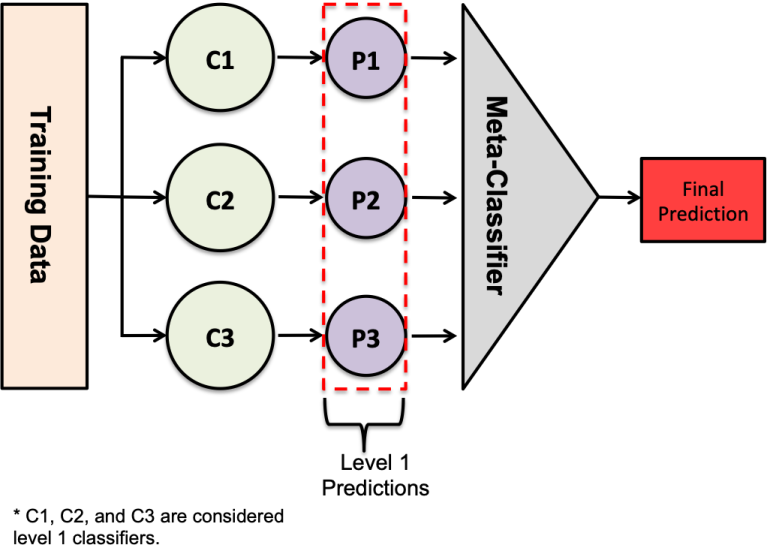

In [ ]:
stack_model = stack_models(estimator_list = [tuned_model2,tuned_model3,tuned_model4,tuned_model5], meta_model = tuned_model1,optimize = 'Recall',choose_better=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9405  0.9625  0.9318  0.9535  0.9425  0.8808  0.8811
1       0.8929  0.9165  0.9318  0.8723  0.9011  0.7845  0.7865
2       0.9518  0.9875  0.9767  0.9333  0.9545  0.9033  0.9044
3       0.8193  0.9314  0.8372  0.8182  0.8276  0.6378  0.6380
4       0.9398  0.9808  0.9535  0.9318  0.9425  0.8793  0.8795
5       0.8795  0.9362  0.8864  0.8864  0.8864  0.7582  0.7582
6       0.9036  0.9537  0.9545  0.8750  0.9130  0.8054  0.8092
7       0.9036  0.9478  0.9318  0.8913  0.9111  0.8060  0.8069
8       0.8916  0.9260  0.9545  0.8571  0.9032  0.7807  0.7866
9       0.9277  0.9674  0.9318  0.9318  0.9318  0.8549  0.8549
Mean    0.9050  0.9510  0.9290  0.8951  0.9114  0.8091  0.8105
Std     0.0367  0.0225  0.0380  0.0399  0.0347  0.0738  0.0736

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 13
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.15,
                                                           loss='deviance',
                                                           max_depth=4,
                                                           max_features='log2',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.01,
                                                           min_impurity_split=None,
                                 

In [ ]:
print(stack_model)

StackingClassifier(cv=5,
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.15,
                                                           loss='deviance',
                                                           max_depth=4,
                                                           max_features='log2',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.01,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=4,
                                                           min_samples

## Blending
Blending is similar to stacking, but uses a holdout set from the training set to make predictions. So, predictions are done on the holdout set only. The predictions and holdout set are used to build a final model that makes predictions on the test set. 

### Soft Voting

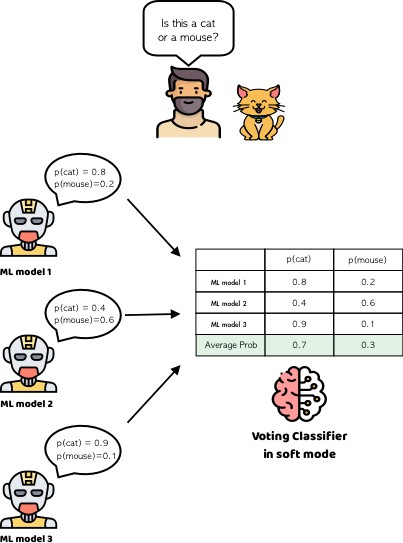

In [ ]:
blend_soft = blend_models(estimator_list = [tuned_model1,tuned_model2,tuned_model3,tuned_model4,tuned_model5], optimize = 'Recall',method = 'soft',choose_better=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9286  0.9602  0.9091  0.9524  0.9302  0.8571  0.8581
1       0.8929  0.9188  0.9091  0.8889  0.8989  0.7850  0.7852
2       0.9639  0.9837  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8434  0.9401  0.8837  0.8261  0.8539  0.6855  0.6873
4       0.9398  0.9872  0.9302  0.9524  0.9412  0.8795  0.8797
5       0.8795  0.9213  0.8864  0.8864  0.8864  0.7582  0.7582
6       0.9157  0.9662  0.9545  0.8936  0.9231  0.8300  0.8322
7       0.8916  0.9481  0.9091  0.8889  0.8989  0.7820  0.7823
8       0.8916  0.9318  0.9318  0.8723  0.9011  0.7814  0.7835
9       0.9398  0.9656  0.9318  0.9535  0.9425  0.8793  0.8795
Mean    0.9086  0.9523  0.9223  0.9069  0.9142  0.8165  0.8174
Std     0.0337  0.0230  0.0275  0.0419  0.0309  0.0679  0.0676

INFO:logs:create_model_container: 39
INFO:logs:master_model_container: 39
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                 

In [ ]:
print(blend_soft)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

###Hard Voting

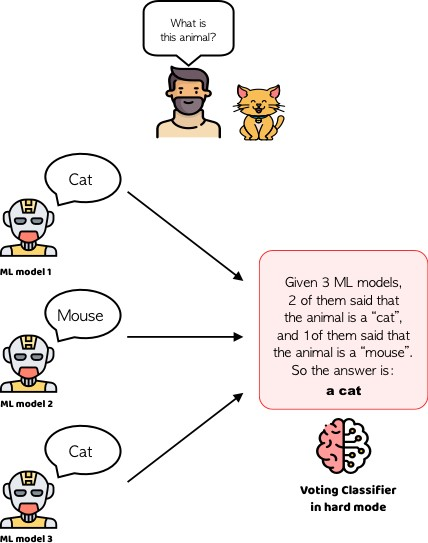

In [ ]:
blend_hard = blend_models(estimator_list = [tuned_model1,tuned_model2,tuned_model3,tuned_model4,tuned_model5], optimize = 'Recall',method = 'hard',choose_better=True)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.9286  0.0  0.9091  0.9524  0.9302  0.8571  0.8581
1       0.8929  0.0  0.9091  0.8889  0.8989  0.7850  0.7852
2       0.9639  0.0  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8434  0.0  0.8837  0.8261  0.8539  0.6855  0.6873
4       0.9398  0.0  0.9302  0.9524  0.9412  0.8795  0.8797
5       0.8795  0.0  0.8864  0.8864  0.8864  0.7582  0.7582
6       0.9157  0.0  0.9545  0.8936  0.9231  0.8300  0.8322
7       0.8795  0.0  0.9091  0.8696  0.8889  0.7575  0.7583
8       0.8916  0.0  0.9318  0.8723  0.9011  0.7814  0.7835
9       0.9398  0.0  0.9318  0.9535  0.9425  0.8793  0.8795
Mean    0.9074  0.0  0.9223  0.9050  0.9132  0.8141  0.8150
Std     0.0345  0.0  0.0275  0.0431  0.0315  0.0695  0.0692

INFO:logs:create_model_container: 45
INFO:logs:master_model_container: 45
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                 

In [ ]:
print(blend_hard)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

#Leaderboard 

In [ ]:
#Leaderboard 

In [ ]:
leader=get_leaderboard()

**In total, there are 45 models was trained, tuned and generated by different methods**




In [ ]:
leader

Model Name  \
Index                                    
0                  Logistic Regression   
1               K Neighbors Classifier   
2                          Naive Bayes   
3             Decision Tree Classifier   
4                  SVM - Linear Kernel   
5                     Ridge Classifier   
6             Random Forest Classifier   
7      Quadratic Discriminant Analysis   
8                 Ada Boost Classifier   
9         Gradient Boosting Classifier   
10        Linear Discriminant Analysis   
11              Extra Trees Classifier   
12     Light Gradient Boosting Machine   
13            Random Forest Classifier   
14        Gradient Boosting Classifier   
15              Extra Trees Classifier   
16     Light Gradient Boosting Machine   
17                 Logistic Regression   
18            Random Forest Classifier   
19            Random Forest Classifier   
20        Gradient Boosting Classifier   
21        Gradient Boosting Classifier   
22              Extra Trees Classifier   
23              Extra Trees Classifier   
24     Light Gradient Boosting Machine   
25     Light Gradient Boosting Machine   
26                 Logistic Regression   
27                 Logistic Regression   
28                 Stacking Classifier   
29        Gradient Boosting Classifier   
30              Extra Trees Classifier   
31     Light Gradient Boosting Machine   
32                 Logistic Regression   
33                   Voting Classifier   
34            Random Forest Classifier   
35        Gradient Boosting Classifier   
36              Extra Trees Classifier   
37     Light Gradient Boosting Machine   
38                 Logistic Regression   
39                   Voting Classifier   
40            Random Forest Classifier   
41        Gradient Boosting Classifier   
42              Extra Trees Classifier   
43     Light Gradient Boosting Machine   
44                 Logistic Regression   

                                                   Model  Accuracy     AUC  \
Index                                                                        
0      (DataTypes_Auto_infer(categorical_features=['S...    0.8486  0.9204   
1      (DataTypes_Auto_infer(categorical_features=['S...    0.6877  0.7450   
2      (DataTypes_Auto_infer(categorical_features=['S...    0.8270  0.9076   
3      (DataTypes_Auto_infer(categorical_features=['S...    0.8462  0.8465   
4      (DataTypes_Auto_infer(categorical_features=['S...    0.6000  0.0000   
5      (DataTypes_Auto_infer(categorical_features=['S...    0.8462  0.0000   
6      (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
7      (DataTypes_Auto_infer(categorical_features=['S...    0.5731  0.5710   
8      (DataTypes_Auto_infer(categorical_features=['S...    0.8522  0.9168   
9      (DataTypes_Auto_infer(categorical_features=['S...    0.8894  0.9428   
10     (DataTypes_Auto_infer(categorical_features=['S...    0.8462  0.9200   
11     (DataTypes_Auto_infer(categorical_features=['S...    0.8918  0.9521   
12     (DataTypes_Auto_infer(categorical_features=['S...    0.9002  0.9524   
13     (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
14     (DataTypes_Auto_infer(categorical_features=['S...    0.8894  0.9428   
15     (DataTypes_Auto_infer(categorical_features=['S...    0.8918  0.9521   
16     (DataTypes_Auto_infer(categorical_features=['S...    0.9002  0.9524   
17     (DataTypes_Auto_infer(categorical_features=['S...    0.8486  0.9204   
18     (DataTypes_Auto_infer(categorical_features=['S...    0.9002  0.9511   
19     (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
20     (DataTypes_Auto_infer(categorical_features=['S...    0.9027  0.9428   
21     (DataTypes_Auto_infer(categorical_features=['S...    0.8894  0.9428   
22     (DataTypes_Auto_infer(categorical_features=['S...    0.8738  0.9317   
23     (DataTypes_Auto_infer(categorical_features=['S...    0.8918  0.9521   
24     (DataTypes_Auto_in

**Top 10 Models:** <br>
Models generated using the Stacking and Blending method clearly outperformed other models.


In [ ]:
leader[leader['Accuracy'] > .85].sort_values(by=['Recall'],ascending=False).head(10)

Model Name  \
Index                                 
28              Stacking Classifier   
33                Voting Classifier   
39                Voting Classifier   
6          Random Forest Classifier   
19         Random Forest Classifier   
34         Random Forest Classifier   
29     Gradient Boosting Classifier   
40         Random Forest Classifier   
20     Gradient Boosting Classifier   
35     Gradient Boosting Classifier   

                                                   Model  Accuracy     AUC  \
Index                                                                        
28     (DataTypes_Auto_infer(categorical_features=['S...    0.9050  0.9510   
33     (DataTypes_Auto_infer(categorical_features=['S...    0.9086  0.9523   
39     (DataTypes_Auto_infer(categorical_features=['S...    0.9074  0.0000   
6      (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
19     (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
34     (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
29     (DataTypes_Auto_infer(categorical_features=['S...    0.9027  0.9428   
40     (DataTypes_Auto_infer(categorical_features=['S...    0.9026  0.9511   
20     (DataTypes_Auto_infer(categorical_features=['S...    0.9027  0.9428   
35     (DataTypes_Auto_infer(categorical_features=['S...    0.9027  0.9428   

       Recall   Prec.      F1   Kappa     MCC  
Index                                          
28     0.9290  0.8951  0.9114  0.8091  0.8105  
33     0.9223  0.9069  0.9142  0.8165  0.8174  
39     0.9223  0.9050  0.9132  0.8141  0.8150  
6      0.9154  0.9024  0.9085  0.8044  0.8052  
19     0.9154  0.9024  0.9085  0.8044  0.8052  
34     0.9154  0.9024  0.9085  0.8044  0.8052  
29     0.9154  0.9017  0.9081  0.8046  0.8055  
40     0.9154  0.9024  0.9085  0.8044  0.8052  
20     0.9154  0.9017  0.9081  0.8046  0.8055  
35     0.9154  0.9017  0.9081  0.8046  0.8055

#Model Calibrating

In [ ]:
cali_model = calibrate_model(stack_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9048  0.9528  0.9091  0.9091  0.9091  0.8091  0.8091
1       0.8690  0.9205  0.8864  0.8667  0.8764  0.7372  0.7374
2       0.9639  0.9849  0.9767  0.9545  0.9655  0.9276  0.9278
3       0.8554  0.9401  0.9070  0.8298  0.8667  0.7095  0.7128
4       0.9398  0.9802  0.9302  0.9524  0.9412  0.8795  0.8797
5       0.8675  0.9289  0.8864  0.8667  0.8764  0.7336  0.7338
6       0.9277  0.9610  0.9773  0.8958  0.9348  0.8540  0.8581
7       0.9157  0.9452  0.9545  0.8936  0.9231  0.8300  0.8322
8       0.8916  0.9341  0.9545  0.8571  0.9032  0.7807  0.7866
9       0.9398  0.9685  0.9318  0.9535  0.9425  0.8793  0.8795
Mean    0.9075  0.9516  0.9314  0.8979  0.9139  0.8140  0.8157
Std     0.0343  0.0207  0.0322  0.0420  0.0315  0.0691  0.0686

INFO:logs:create_model_container: 46
INFO:logs:master_model_container: 46
INFO:logs:display_container: 29
INFO:logs:CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('gbc',
                                                                      GradientBoostingClassifier(ccp_alpha=0.0,
                                                                                                 criterion='friedman_mse',
                                                                                                 init=None,
                                                                                                 learning_rate=0.15,
                                                                                                 loss='deviance',
                                                                                                 max_depth=4,
                                                            

#Model Finalizing
Trains the model on the entire dataset including the hold-out set.

In [ ]:
final_model = finalize_model(cali_model)

## Boundary

In [ ]:
import matplotlib.pyplot as plt

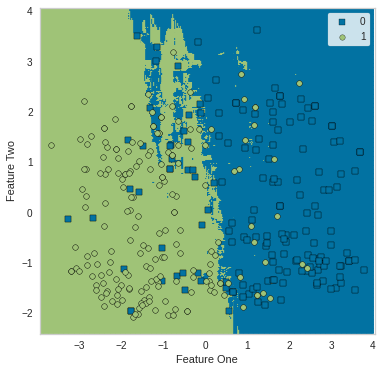

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='boundary')

##AUC

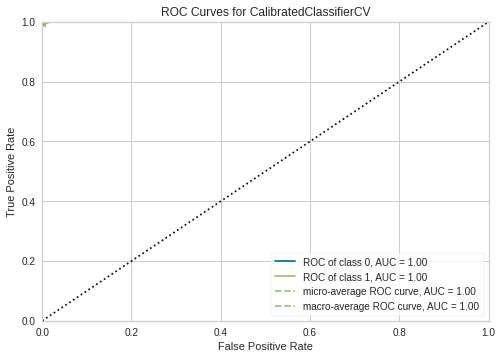

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'auc')

## Confusion Matrix

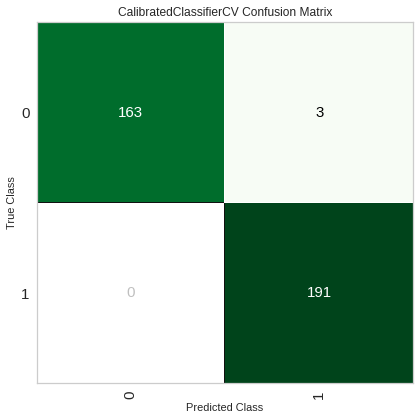

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

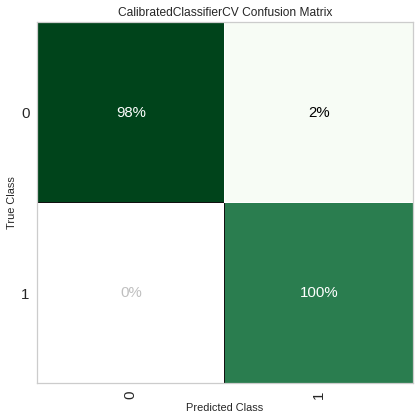

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Classification Report

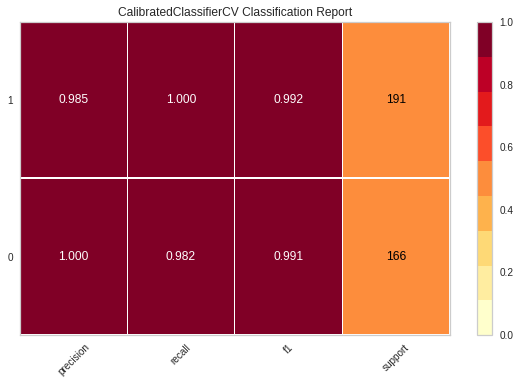

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'class_report', plot_kwargs = {'percent' : True})

##Model Hyperparameter

In [ ]:
plot_model(final_model, plot = 'parameter')

Parameters
base_estimator  StackingClassifier(cv=5,\n                   e...
cv                                                              5
method                                                    sigmoid

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


##MODEL STATS

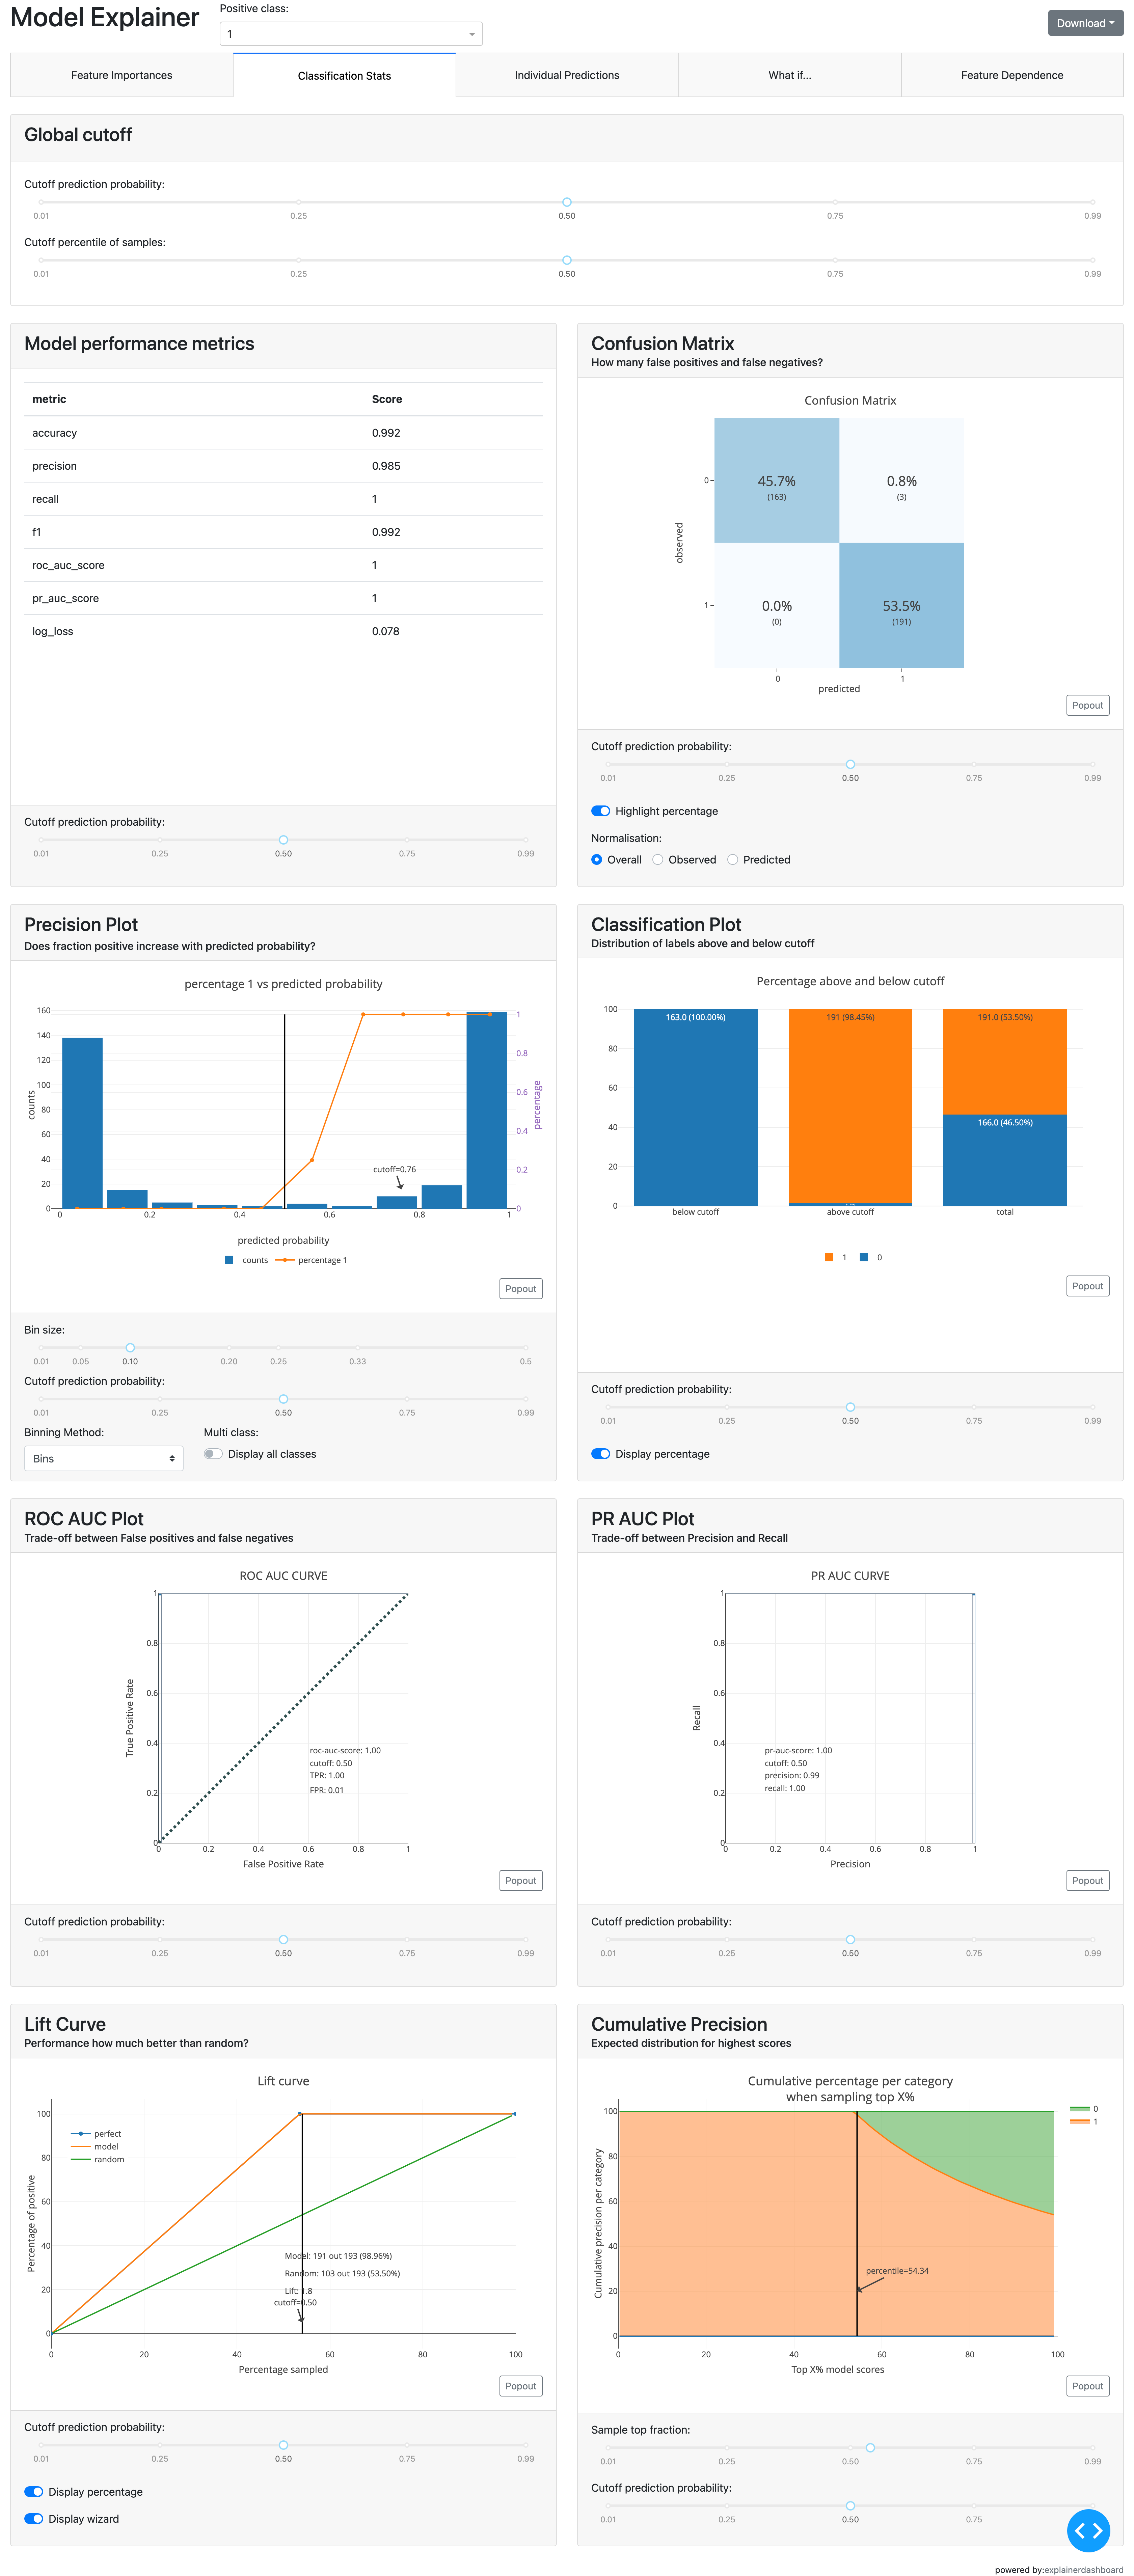

#Model Testing

In [ ]:
pred_df = predict_model(final_model, heart_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('gbc',
                                                                      GradientBoostingClassifier(ccp_alpha=0.0,
                                                                                                 criterion='friedman_mse',
                                                                                                 init=None,
                                                                                                 learning_rate=0.15,
                                                                                                 loss='deviance',
                                                                                                 max_depth=4,
                                                                                                 max_fe

Model  Accuracy  AUC  Recall   Prec.     F1   Kappa     MCC
0  Stacking Classifier    0.9958  1.0     1.0  0.9921  0.996  0.9916  0.9916

In [ ]:
pred_df.head()

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289         N     Normal    172   
1   49   F           NAP        160          180         N     Normal    156   
2   37   M           ATA        130          283         N         ST     98   
3   48   F           ASY        138          214         N     Normal    108   
4   54   M           NAP        150          195         N     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Label   Score  
0              N      0.0       UP             0      0  0.9744  
1              N      1.0     FLAT             1      1  0.6297  
2              N      0.0       UP             0      0  0.9667  
3              Y      1.5     FLAT             1      1  0.9584  
4              N      0.0       UP             0      0  0.9689

In [ ]:
pred_df[['HeartDisease', 'Label','Score']].loc[[13]]

HeartDisease  Label   Score
13             1      1  0.9618

#Saving Model

In [ ]:
#saved_model=save_model(final_model,model_name ='/content/drive/MyDrive/0_data_science/Saved_Models/Heart_Disease_Oct02/Final_Recall1_v2310' )


In [ ]:
# save config
save_config('/content/drive/MyDrive/0_data_science/Saved_Models/Heart_Disease_Oct02/my_config')

INFO:logs:Initializing save_config()
INFO:logs:save_config(file_name=/content/drive/MyDrive/0_data_science/Saved_Models/Heart_Disease_Oct02/my_config)
INFO:logs:Global variables dumped to /content/drive/MyDrive/0_data_science/Saved_Models/Heart_Disease_Oct02/my_config
INFO:logs:save_config() succesfully completed......................................


#Model Deployment

##Fast API

In [ ]:
#create_api(final_model, '/content/drive/MyDrive/0_data_science/Saved_Models/Heart_Disease_Oct02/api/final_model_api_v2310')

localhost:8000/docs

## Gradio

In [ ]:
create_app(final_model) 

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  \
0      40   M           ATA        140          289         N     Normal   
1      49   F           NAP        160          180         N     Normal   
2      37   M           ATA        130          283         N         ST   
3      48   F           ASY        138          214         N     Normal   
4      54   M           NAP        150          195         N     Normal   
...   ...  ..           ...        ...          ...       ...        ...   
1185   45   M            TA        110          264         N     Normal   
1186   68   M           ASY        144          193         Y     Normal   
1187   57   M           ASY        130          131         N     Normal   
1188   57   F           ATA        130          236         N        LVH   
1189   38   

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://23315.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f2242dfa9d0>,
 'http://127.0.0.1:7860/',
 'https://23315.gradio.app')

##Dashboard

In [ ]:
dashboard(final_model)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex',
                                                            'ChestPainType',
                                                            'FastingBS',
                                                            'RestingECG',
                                                            'ExerciseAngina',
                                                            'ST_Slope'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'Cholesterol',
                                                          'RestingBP', 'MaxHR',
                         

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/357 [00:00<?, ?it/s]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('gbc',
                                                                      GradientBoostingClassifier(ccp_alpha=0.0,
                                                                                                 criterion='friedman_mse',
                                                                                                 init=None,
                                                                                                 learning_rate=0.15,
                                                                                                 loss='deviance',
                                                                                                 max_depth=4,
                                                                                                 max_fe

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

#MODEL EXPLAINER

In [ ]:
pred_df.loc[[604]]

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  \
604   58   M           NAP        150          219         N         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Label   Score  
604    118              Y      0.0     FLAT             1      1  0.9575

## Gradio App

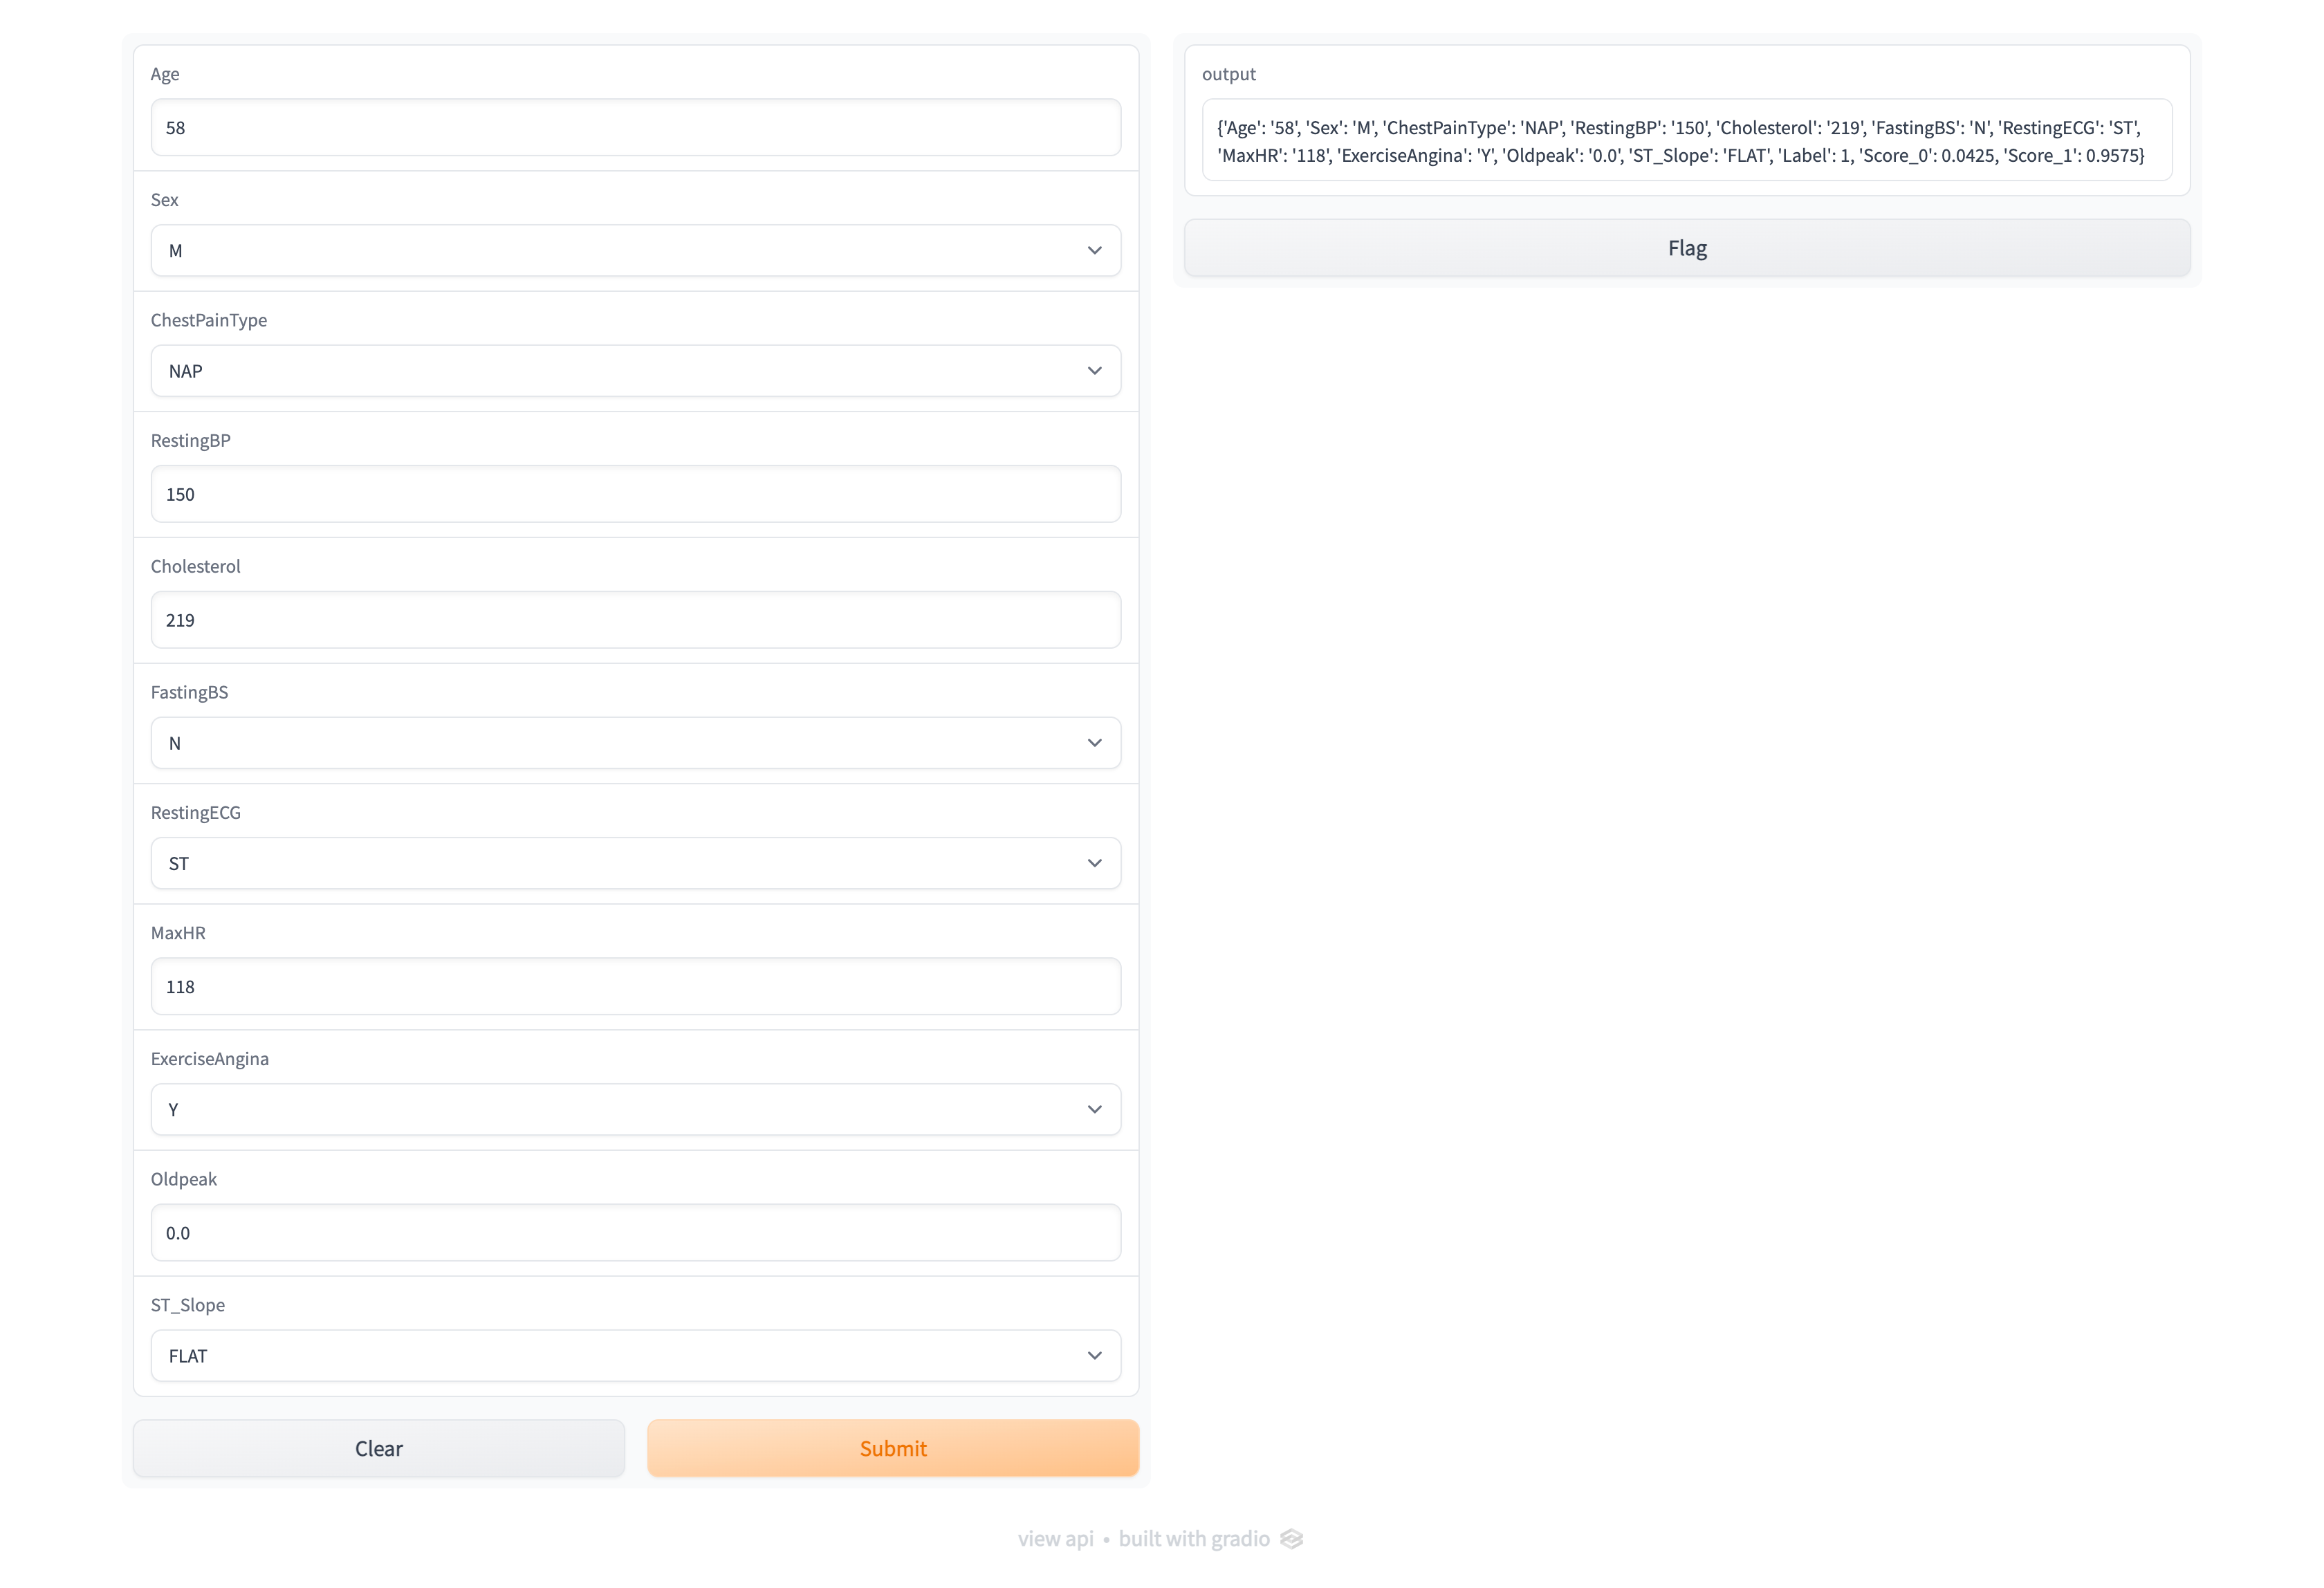

## Individual Prediction

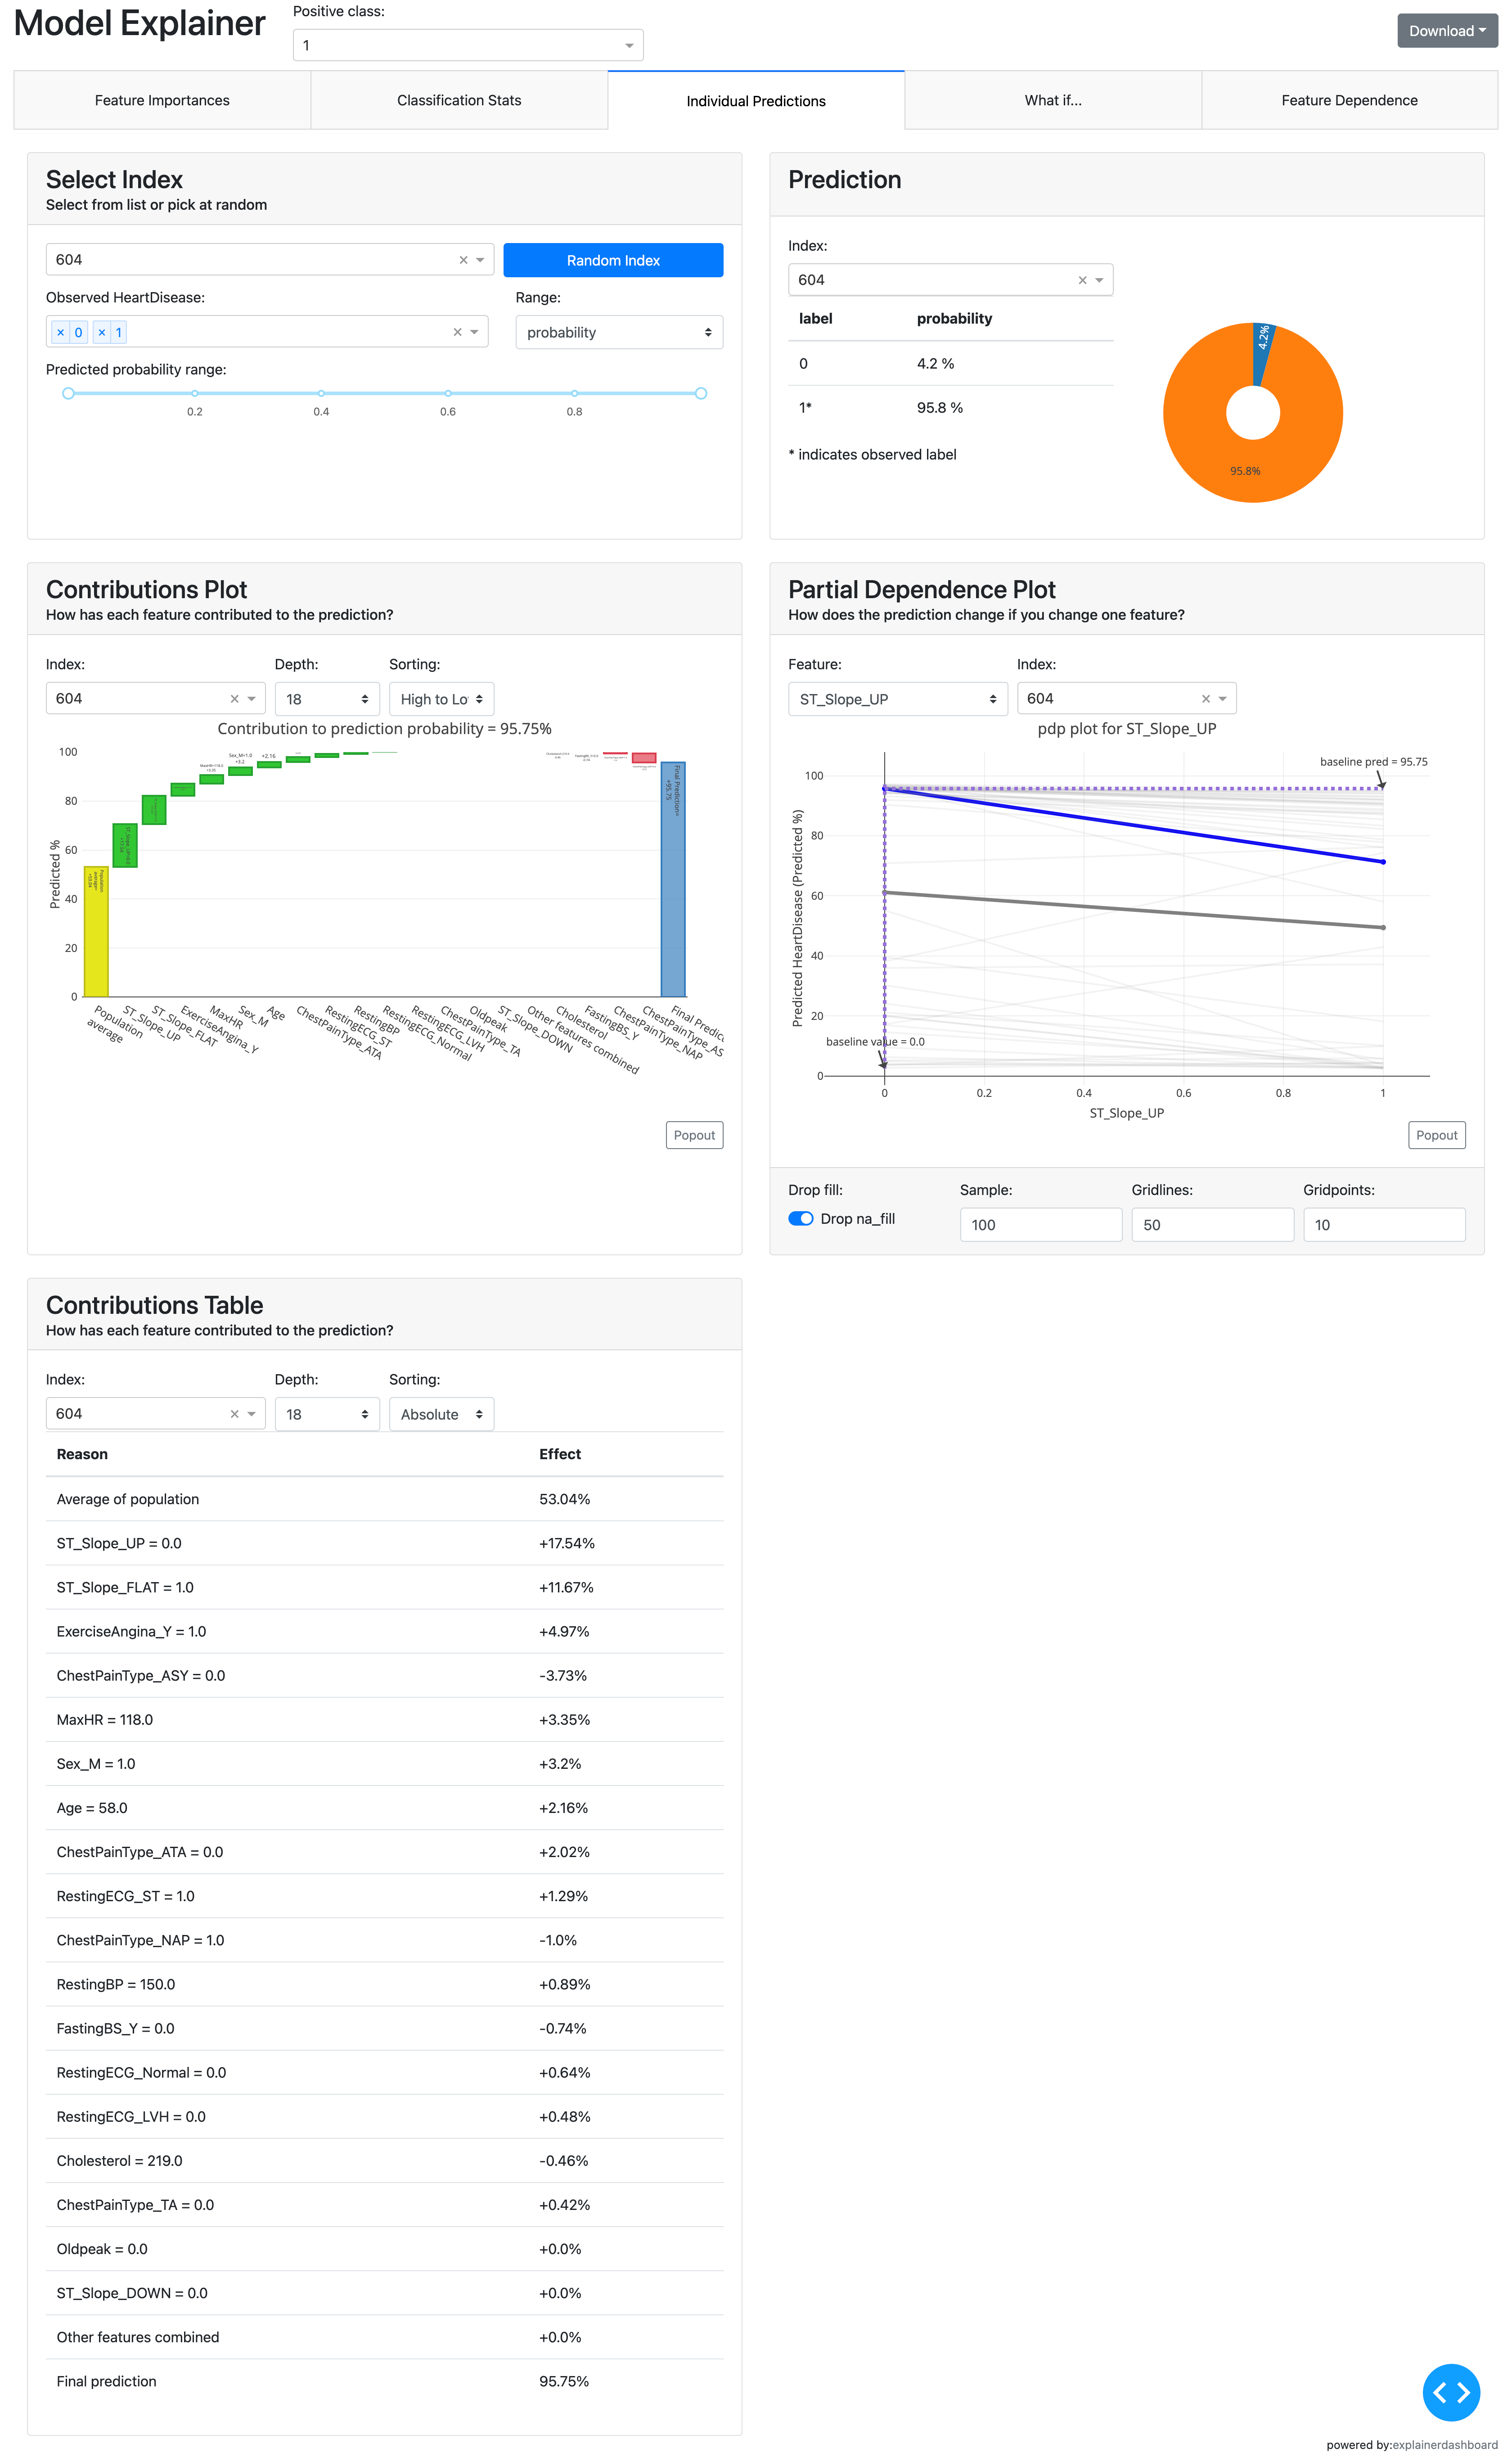